Submitters:

1.   Shani Eliyahou - 322691668
2.   Oren Jacob - 315942763
3.   Amir Khier - 315128967

# **<font size="6">1) Import Libraries</font>**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import keras
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import os
import zipfile
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers
from keras.models import load_model
from keras.preprocessing import image
from keras.callbacks import TensorBoard
from keras.utils import img_to_array
import tensorflow as tf
import cv2

# **<font size="6">2) Upload Datasets</font>**




In [ ]:
files.upload()

**<font size="7">Part A - Classification and Neural Networks</font>**

In [ ]:
df = pd.read_csv("pistachio.csv")
le = LabelEncoder()
X= df.drop(columns=['Class'])
Y = pd.DataFrame(le.fit_transform(df['Class']), columns = ['Class'])

In [ ]:
print(dict(zip(le.classes_,range(len(le.classes_)))))

{'Kirmizi Pistachio': 0, 'Siirt Pistachio': 1}


# **<font size="6">3) Data Preprocessing</font>**

<font size="5">Checking for missing values</font>

In [ ]:
df.isna().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

<p dir="rtl">
מאגר זה אינו מכיל נתונים חסרים
</p>

<font size="5">Checking features' ranges</font>


In [ ]:
X.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,79871.952852,1421.797588,446.206444,238.193128,0.840347,317.790000,0.940103,84947.671129,0.716055,1.899342,0.570831,0.712841,0.005704,0.003017,0.510097,0.955185
std,12968.217051,373.408835,31.885328,30.426445,0.049026,26.571699,0.050006,13081.742551,0.052534,0.241253,0.211514,0.044230,0.000810,0.000334,0.063391,0.051735
min,29808.000000,858.363000,321.425500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71898.500000,1169.633225,426.554100,217.875475,0.817500,302.562375,0.920250,76357.750000,0.688100,1.736325,0.372325,0.682000,0.005200,0.002800,0.465125,0.944200
50%,79795.000000,1260.785500,448.453150,235.888750,0.850250,318.744650,0.953800,84973.000000,0.726100,1.899550,0.643850,0.709750,0.005600,0.003000,0.503750,0.972800
75%,88980.000000,1599.479000,467.515200,257.433625,0.875375,336.590000,0.976300,93660.750000,0.753600,2.068575,0.744450,0.741600,0.006100,0.003200,0.549975,0.986800
max,124008.000000,2755.049100,535.642200,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.869500,0.013100,0.005300,0.756100,0.999000


<p dir="rtl">
לא נראה כי ישנם ערכים בלתי סבירים בכלל המשתנים.
</p>

# **<font size=6>4) Data Train-Test Split</font>**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 6)

## **<font size=6>5) Classes Balancing</font>**

Class
0        788
1        586
dtype: int64


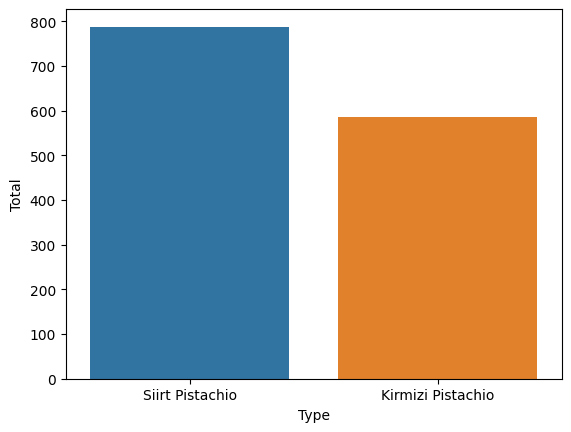

In [ ]:
counts = Y_train.value_counts()
types = le.inverse_transform(Y_train['Class'].unique())
sns.barplot(x = types, y = counts)
plt.xlabel('Type')
plt.ylabel('Total')
print(counts)
plt.show()

In [ ]:
sampler = ADASYN(random_state = 6)
X_train_resampled, Y_train_resampled = sampler.fit_resample(X_train, Y_train)

<p dir="rtl">
בחרנו בשיטת ADASYN על מנת לאזן את שכיחות הקטגוריות. מתוך ספירת הקטגוריות עולה כי בסט האימון ישנם כ-57% פיסטוקים מזן Kirmizi, לעומת כ-43% פיסטוקים מזן Siirt. היות שמדובר בפער לא משמעותי, איזון הנתונים אינו הכרחי. שיטה זו נבחרה מכיוון שאנו מעוניינים לשמר את הנתונים הקיימים בניגוד לשיטות undersampling שמחסירות שורות שעמודת המטרה שלהם שייכת למחלקת הרוב.
כמו כן, מכיוון ששיטה זו מתבססת על הצפיפות של מופעי מחלקת המיעוט, בניגוד לשיטות אחרות היא גם מפיקה דגימות מאזורים חריגים במרחב התכונות (features). לפיכך, שיטה זו עדיפה על פני האחרות כאשר נתון לנו מאגר נתונים שבו מחלקת המיעוט מאופיין בפיזור רחב על פני מרחב התכונות.
</p>

## **<font size=6>6) Training Models</font>**

## **<font size=5>Random Forest Classifier</font>**

<font size="4"><li>Building a pipeline:</li></font>




In [ ]:
steps = [('scaler', StandardScaler()), ('rfc', RandomForestClassifier(random_state = 6))]
rfc_gridsearch_pipeline = Pipeline(steps)

<font size="4"><li>Creating hyperparameters dictionary:</li></font>




In [ ]:
rfc_grid_params = {
    'rfc__n_estimators' : [25,30,35,40,45],
    'rfc__max_depth': [3,4,5,6,7]
    }

<font size="4"><li><b>(6a+6b)</b> Performing a grid search cross validation:</li></font>

In [ ]:
rfc_grid = GridSearchCV(rfc_gridsearch_pipeline, param_grid=rfc_grid_params, n_jobs = -1)
rfc_grid.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfc',
                                        RandomForestClassifier(random_state=6))]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [3, 4, 5, 6, 7],
                         'rfc__n_estimators': [25, 30, 35, 40, 45]})

<font size="4"><li><b>(6c)</b> Printing the best hyperparameters' values:</li></font>

In [ ]:
print(rfc_grid.best_params_)

{'rfc__max_depth': 5, 'rfc__n_estimators': 30}


<font size="4"><li><b>(6d)</b> Chosen hyperparameters roles:</li></font>

<font size="3" dir="rtl">
<ul>
<li><b><u>n_estimators</u> - </b>  מגדיר את מספר עצי ההחלטה אשר יווצרו על ידי המודל.</li>
<li><b><u>max_depth</u> - </b>  מגדיר את העומק המקסימלי של כל עץ החלטה שיווצר ביער. לפרמטר זה חשיבות רבה באיכות המודל, אי כיוונון או ערך גבוה עלולים לגרום לבעיית overfitting.</li>
</ul>
</font>

<font size="4"><li>Creating RFC training pipeline with the best hyperparameters:</li></font>

In [ ]:
steps = [('scaler', StandardScaler()),
        ('rfc', RandomForestClassifier(max_depth = 5, n_estimators = 30, random_state = 6))]
rfc_pipeline = Pipeline(steps)

## **<font size=5>XGBoost Classifier</font>**

<font size="4"><li>Building a pipeline:</li></font>




In [ ]:
steps = [('scaler', StandardScaler()), ('xgb', xgb.XGBClassifier(random_state = 6))]
xgb_gridsearch_pipeline = Pipeline(steps)

<font size="4"><li>Creating hyperparameters dictionary:</li></font>




In [ ]:
xgb_grid_params = {
    'xgb__reg_lambda' : [190, 195, 200, 205, 210],
    'xgb__max_depth': [3,4,5,6,7]
    }

<font size="4"><li><b>(6a+6b)</b> Performing a grid search cross validation:</li></font>

In [ ]:
xgb_grid = GridSearchCV(xgb_gridsearch_pipeline, param_grid=xgb_grid_params, n_jobs = -1)
xgb_grid.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      in...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=6, ...))]),
             n_jobs=-1,
             param_grid={'xgb__max_depth': [3, 4, 5, 6, 7],
                         'xgb__reg_lambda': [190, 195, 200, 205, 210]})

<font size="4"><li><b>(6c)</b> Printing the best hyperparameters' values:</li></font>

In [ ]:
print(xgb_grid.best_params_)

{'xgb__max_depth': 6, 'xgb__reg_lambda': 200}


<font size="4"><li><b>(6d)</b> Chosen hyperparameters roles:</li></font>

<font size="3" dir="rtl">
<ul>
<li><b><u>reg_lambda</u> - </b>  מגדיר את המשקל של רגולריזציית L2 בפונקציית המודל. ככל שערך הפרמטר יהיה גבוה יותר כך המודל פחות רגיש לרעשים וכך ימנע overfitting.</li>
<li><b><u>max_depth</u> - </b>  מגדיר את העומק המקסימלי של העצים שיווצרו במודל.</li>
</ul>
</font>

<font size="4"><li>Creating XGB training pipeline with the best hyperparameters:</li></font>

In [ ]:
steps = [('scaler', StandardScaler()),
        ('xgb', xgb.XGBClassifier(max_depth = 5, reg_lambda = 200, random_state = 6))]
xgb_pipeline = Pipeline(steps)

## **<font size=6>7)  Train a Neural Network</font>**

<font size="4"><li>Standardizing the train set:</li></font>

In [ ]:
scaler = StandardScaler()
X_NN_train = scaler.fit_transform(X_train)

<font size="4"><li>Checking the shape of "X_NN_train":</li></font>

In [ ]:
X_NN_train.shape

(1374, 16)

<font size="4"><li>Building the neural network:</li></font>

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(28, input_dim=16, activation='relu'))
nn_model.add(Dense(21, activation='sigmoid'))
nn_model.add(Dense(24, activation='softmax'))
nn_model.add(Dense(1, activation='sigmoid'))

<div dir="rtl">
<font size="3">
רשת נוירונים זו מורכבת מ-4 שכבות כאשר 3 שכבות הן נסתרות (hidden) ואילו השכבה האחרונה היא שכבת הפלט (output) ומכילה נוירון יחיד המהווה את עמודת המטרה (שהמרנו אותה לבינארית [0 או 1] קודם לכן).
<br><br>
<ul>
<li>
בשכבה הראשנה ישנם 28 נוירונים אשר כל אחד מהם מחובר ל-16 המאפיינים (טבלת X). גודל שכבת המאפיינים (input layer) מוגדר על ידי הפרמטר input_dim. כל נוירון בשכבה זו מחובר בסכום ממושקל של כל אחד מ-16 המאפיינים והחותך (bias).
סכום זה מעובד כפלט של אותו נוירון בשכבה על ידי פונקציית הפעלה (המוגדת על ידי הפרמטר activation) אשר ישומש לשכבת הנוירונים הבאה. כל נוירון בשכבה זו מופעל על ידי פונקציית "relu" המוגדרת כבחירה של הערך המקסימלי בין 0 לבין הסכום המשוקלל
שהתקבל לנוירון
</li>
<li>
בשכבה השנייה ישנם 21 נוירונים. כל נוירון מחובר בסכום ממושקל של 28 הנוירונים והחותך (bias) בשכבה הקודמת. כל נוירון מופעל על ידי פונקציית ה-sigmoid.
</li>
<li>
בשכבה השלישית ישנם 24 נוירונים. כל נוירון מחובר בסכום ממושקל של 21 הנוירונים והחותך (bias) בשכבה הקודמת. כל נוירון מופעל על ידי פונקציית softmax.
</li>
<li>
בשכבה הרבעית נוירון בודד. נוירון זה מחובר בסכום ממושקל של 24 הנוירונים והחותך (bias) בשכבה הקודמת. נוירון זה מופעל על ידי פונקציית ה-sigmoid.
</li>
</ul>
</font>
</div>

<font size="4"><li>Set loss function and optimizer:</li></font>

In [ ]:
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<font size="4"><li>Training the model:</li></font>

In [ ]:
history = nn_model.fit(X_NN_train, Y_train, epochs=100, batch_size=64)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.6880 - accuracy: 0.6099
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.5895
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6528
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.7926
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5775 - accuracy: 0.8501
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.8646
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5288 - accuracy: 0.8654
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5145 - accuracy: 0.8654
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.8654
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.8705
Epoch 11/

<font size="4"><li>Neural network summary:</li></font>

<p dir="rtl"><font size="3">ברשת הנוירונים שיצרנו ישנם בסך הכל 1638 פרמטרים. להלן טבלה מסכמת של מבנה הרשת:</font></p>

In [ ]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 28)                476       
                                                                 
 dense_5 (Dense)             (None, 21)                609       
                                                                 
 dense_6 (Dense)             (None, 24)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1638 (6.40 KB)
Trainable params: 1638 (6.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **<font size=6>8)  Data Predictions and Results</font>**

## **<font size=5>(8a) Random Forest Classifier results</font>**

<font size="4"><li>Train results:</li></font>

In [ ]:
rfc_fitted = rfc_pipeline.fit(X_train, Y_train)
rfc_pred_train = rfc_fitted.predict(X_train)
print(classification_report(rfc_pred_train, Y_train))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       804
           1       0.89      0.91      0.90       570

    accuracy                           0.92      1374
   macro avg       0.91      0.92      0.91      1374
weighted avg       0.92      0.92      0.92      1374



/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [ ]:
rfc_mcc_train = matthews_corrcoef(rfc_pred_train, Y_train)
print("MCC value:", rfc_mcc_train)

MCC value: 0.8300365719658932


<font size="4"><li>Test results:</li></font>

In [ ]:
rfc_pred_test = rfc_fitted.predict(X_test)
print(classification_report(rfc_pred_test, Y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       210
           1       0.84      0.84      0.84       134

    accuracy                           0.88       344
   macro avg       0.87      0.87      0.87       344
weighted avg       0.88      0.88      0.88       344



In [ ]:
rfc_mcc_test = matthews_corrcoef(rfc_pred_test, Y_test)
print("MCC value:", rfc_mcc_test)

MCC value: 0.7432835820895523


## **<font size=5>(8a) XGBoost Classifier results</font>**

<font size="4"><li>Train results:</li></font>

In [ ]:
xgb_pipeline.fit(X_train, Y_train)
xgb_pred_train = xgb_pipeline.predict(X_train)
print(classification_report(xgb_pred_train, Y_train))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       788
           1       0.90      0.90      0.90       586

    accuracy                           0.92      1374
   macro avg       0.91      0.91      0.91      1374
weighted avg       0.92      0.92      0.92      1374



In [ ]:
xgb_mcc_train = matthews_corrcoef(xgb_pred_train, Y_train)
print("MCC value:", xgb_mcc_train)

MCC value: 0.8274198298712774


<font size="4"><li>Test results:</li></font>

In [ ]:
xgb_pred_test = xgb_pipeline.predict(X_test)
print(classification_report(xgb_pred_test, Y_test))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       207
           1       0.85      0.83      0.84       137

    accuracy                           0.88       344
   macro avg       0.87      0.87      0.87       344
weighted avg       0.87      0.88      0.87       344



In [ ]:
xgb_mcc_test = matthews_corrcoef(xgb_pred_test, Y_test)
print("MCC value:", xgb_mcc_test)

MCC value: 0.7383548981286792


## **<font size=5>(8a) Neural Network results</font>**

<font size="4"><li>Train results:</li></font>

In [ ]:
nn_pred_train = (nn_model.predict(X_NN_train) > 0.5).astype("int32")
print(classification_report(nn_pred_train, Y_train))

43/43 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       801
           1       0.88      0.90      0.89       573

    accuracy                           0.90      1374
   macro avg       0.90      0.90      0.90      1374
weighted avg       0.90      0.90      0.90      1374



In [ ]:
nn_mcc_train = matthews_corrcoef(nn_pred_train, Y_train)
print("MCC value:", nn_mcc_train)

MCC value: 0.8017144898296618


<font size="4"><li>Test results:</li></font>

In [ ]:
X_NN_test = scaler.fit_transform(X_test)
nn_pred_test = (nn_model.predict(X_NN_test) > 0.5).astype("int32")
print(classification_report(nn_pred_test, Y_test))

11/11 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       206
           1       0.86      0.83      0.85       138

    accuracy                           0.88       344
   macro avg       0.87      0.87      0.87       344
weighted avg       0.88      0.88      0.88       344



In [ ]:
nn_mcc_test = matthews_corrcoef(nn_pred_test, Y_test)
print("MCC value:", nn_mcc_test)

MCC value: 0.7448830806047686


**<font size="5"><li>(8b) Determine best model according accuracy score:</li></font>**

<p dir="rtl">
<font size="3">
למרות שלמודל Random Forest Classifier תוצאת accuracy זהה לתוצאה של מודל רשת הנוירונים של בסט המבחן (88%), מודל רשת הנוירונים הוא הטוב מבין השניים.
זאת מכיוון שעל פי תוצאות ה-accuracy, נראה כי למודל Random Forest Classifier נטייה ל-overfitting (תוצאת ה-accuracy בסט האימון הינה 92% לעומת 88% בסט המבחן)
מאשר למודל רשת הנוירונים (תוצאת ה-accuracy בסט האימון הינה 90% לעומת 88% בסט המבחן).
</font>
</p>


**<font size="5"><li>(8c) Determine best model according the MCC value:</li></font>**

<p dir="rtl">
<font size="3">
מדד ה-MCC הוא מקדם מתאם בין הסיווג הנצפה לסיווג החזוי. טווח הערכים של מדד זה הוא בין 1- לבין 1, כאשר ערך 1 מציין כי ישנה קורלציה חזקה בין סיווג הנצפה אל החזוי, ערך 0 מציין
כי אין קשר בין הסיווגים ואילו ערך 1- מציין כי ישנו קשר הפוך בין הסיווגים. בקלסיפיקציה בינארית מדד זה בודק עד כמה מודל מצליח לחזות היטב את שני המחלקות ולפיכך הוא רלוונטי לשאלת החיזוי שלנו,
שבה אין העדפה לנכונות החיזוי של זן פיסטוק מסויים (כלומר, אנו מעוניינים בחיזוי נכון של 2 זני הפיסטוקים). על פי התוצאות לעיל, בהתבסס על מדד זה נראה כי המודל של רשת הנוירונים הוא
הטוב מבין השלושה, הוא פחות נוטה ל-overfitting (ערך ה-MCC בסט האימון הינו 0.80 לעומת 0.74 בסט המבחן) מאשר מודל Random Forest Classifier (ערך ה-MCC בסט האימון הינו 0.83 לעומת 0.74 בסט המבחן)
ומודל XGBoost (ערך ה-MCC בסט האימון הינו 0.84 לעומת 0.73 בסט המבחן).
</font>
</p>

**<font size="7">Part B - Regression</font>**

In [ ]:
#define mean absolute percentage error metric :
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

סעיף 9

In [ ]:
df_life = pd.read_csv('Life Expectancy Data.csv')
#check missing values:
print(df_life.isna().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
print(df_life.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [ ]:
print(df_life.Status.value_counts())

Developing    2426
Developed      512
Name: Status, dtype: int64


In [ ]:
#transform to "Status" column to dummies:
#only one time use concat
dummies = pd.get_dummies(df_life['Status'], prefix='Status')
df_life = pd.concat([df_life, dummies], axis=1)

In [ ]:
#drop Status Column and drop the irrelevant columns which are "COuntry","year"
#and dropping also the column Status_Developed  because it has alot of zero values
df_life1 = df_life.drop(['Status','Year','Country','Status_Developed'], axis=1)
print(df_life1.head())

   Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0              65.0            263.0             62     0.01   
1              59.9            271.0             64     0.01   
2              59.9            268.0             66     0.01   
3              59.5            272.0             69     0.01   
4              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.2592

In [ ]:
#imput the nan values:
life_impute = SimpleImputer(missing_values=np.NaN, strategy='mean')
transform_life_impute = life_impute.fit_transform(df_life1.values)
df_life_impute = pd.DataFrame(transform_life_impute,columns=df_life1.columns)
df_life_impute.head()
df_life_impute.isna().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developing                  0
dtype: int64

In [ ]:
df_life_impute.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,0.825732
std,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381,0.379405
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000
25%,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,1.000000
50%,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000,1.000000
75%,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000,1.000000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000


Split the data to X,y :

In [ ]:
#X features drop song name , target column():\
X_life_features = df_life_impute.drop('Life expectancy ', axis=1)
y_life_target = df_life_impute['Life expectancy ']

Normalizing Data:

In [ ]:
#Normalizing data:
X_life_norm = StandardScaler().fit_transform(X_life_features)
X_life_norm_df = pd.DataFrame(X_life_norm, columns=X_life_features.columns)
X_life_norm_df.describe()




,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
count,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03
mean,-1.499443e-16,-1.934766e-17,-3.869532e-17,5.078760e-17,3.264917e-17,-7.255372e-18,2.684488e-16,4.836914e-18,-2.478919e-16,1.257598e-16,3.567224e-16,-1.934766e-17,-2.418457e-17,-2.418457e-17,1.451074e-16,-4.353223e-17,-1.620366e-16,5.368975e-16,-2.660303e-17
std,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00
min,-1.320309e+00,-2.570169e-01,-1.172958e+00,-3.714329e-01,-3.539850e+00,-2.110357e-01,-1.873154e+00,-2.620384e-01,-3.407128e+00,-2.320209e+00,-3.398372e+00,-3.234448e-01,-5.696022e-01,-2.370232e-01,-1.078729e+00,-1.064341e+00,-3.064440e+00,-3.674459e+00,-2.176759e+00
25%,-7.318801e-01,-2.570169e-01,-8.965016e-01,-3.690756e-01,0.000000e+00,-2.110357e-01,-9.496575e-01,-2.620384e-01,-1.948842e-01,-6.534490e-01,-1.829444e-01,-3.234448e-01,-5.255349e-01,-2.292382e-01,-7.373374e-01,-7.296647e-01,-6.021004e-01,-5.186529e-01,4.593985e-01
50%,-1.676333e-01,-2.315730e-01,-1.131010e-01,-3.387736e-01,2.683229e-01,-2.095530e-01,2.348267e-01,-2.371036e-01,4.475645e-01,3.700951e-16,4.516794e-01,-3.234448e-01,-3.324508e-01,-1.687060e-01,-3.276681e-01,-3.280533e-01,1.682201e-01,3.284710e-02,4.593985e-01
75%,5.014022e-01,-7.042829e-02,7.118000e-01,-1.492859e-01,6.668526e-01,-1.796149e-01,8.923158e-01,-8.749465e-02,6.188842e-01,5.799536e-01,6.209124e-01,-1.855659e-01,0.000000e+00,0.000000e+00,5.144300e-01,5.197929e-01,7.053691e-01,6.456249e-01,4.593985e-01
max,4.499494e+00,1.500933e+01,3.388259e+00,9.429403e+00,7.996958e-01,1.829547e+01,2.458244e+00,1.532222e+01,7.045440e-01,4.859360e+00,7.055289e-01,9.623530e+00,8.503486e+00,2.380959e+01,5.202868e+00,5.294506e+00,1.564808e+00,2.667792e+00,4.593985e-01


In [ ]:
X_life_norm_df.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,0.255359,-3.278638,0.925806,-0.732952,-0.323445,-0.525248,0.389975,2.813130,2.773279,-0.725401,-0.579931,0.459399
1,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,0.274060,-1.051482,0.934140,-0.859877,-0.323445,-0.523083,-0.230936,2.881408,2.817902,-0.740050,-0.610570,0.459399
2,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,0.292761,-0.880163,0.913306,-0.775260,-0.323445,-0.521632,0.352715,2.926927,2.862526,-0.769349,-0.641209,0.459399
3,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,0.317696,-0.666013,1.075815,-0.648335,-0.323445,-0.518723,-0.168315,2.972446,2.929461,-0.803531,-0.671847,0.459399
4,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,0.342631,-0.623183,0.804966,-0.606027,-0.323445,-0.564893,-0.181666,3.040724,2.974085,-0.847480,-0.763764,0.459399


In [ ]:
#train test split :
train_life_X, test_life_X, train_life_Y, test_life_Y = train_test_split(X_life_norm_df,y_life_target,test_size=0.2,random_state=8123)

סעיף 10

predict linear regression model:

In [ ]:
# TRAIN MODEL using sklearn linearRegression
lin_model = LinearRegression()
lin_model.fit(train_life_X,train_life_Y)

LinearRegression()

סעיף 11


חלק א


Executing Predict on train set , Executing output of metrics that belongs to linear regression model:

In [ ]:
# model evaluation for train set
y_train_life_predict = lin_model.predict(train_life_X)
Lin_r2_life_train=r2_score(train_life_Y,y_train_life_predict )
Lin_RMSE_life_train = (np.sqrt(mean_squared_error(train_life_Y,y_train_life_predict)))
Lin_MAE_life_train=mean_absolute_error(train_life_Y,y_train_life_predict)
Lin_MAPE_life_train=mean_absolute_percentage_error(train_life_Y,y_train_life_predict)
print("The model performance for training set")
print("--------------------------------------")
print('R-squared is {}'.format(Lin_r2_life_train))
print('RMSE is {}'.format(Lin_RMSE_life_train))
print('MAE score is {}'.format(Lin_MAE_life_train))
print('MAPE score is {}'.format(Lin_MAPE_life_train))
print("\n")

The model performance for training set
--------------------------------------
R-squared is 0.823049225347736
RMSE is 4.06655195021274
MAE score is 3.038358427444256
MAPE score is 4.662192958807227




סעיף 11


חלק ב

Executing Predict on testing set , Executing output of metrics that belongs to linear regression model:

In [ ]:
# model evaluation for test set
y_test_life_predict = lin_model.predict(test_life_X)
Lin_r2_life_test=r2_score(test_life_Y,y_test_life_predict )
Lin_RMSE_life_test = (np.sqrt(mean_squared_error(test_life_Y,y_test_life_predict)))
Lin_MAE_life_test=mean_absolute_error(test_life_Y,y_test_life_predict)
Lin_MAPE_life_test=mean_absolute_percentage_error(test_life_Y,y_test_life_predict)
print("The model performance for test set")
print("--------------------------------------")
print('R-squared is {}'.format(Lin_r2_life_test))
print('RMSE is {}'.format(Lin_RMSE_life_test))
print('MAE score is {}'.format(Lin_MAE_life_test))
print('MAPE score is {}'.format(Lin_MAPE_life_test))
print("\n")

The model performance for test set
--------------------------------------
R-squared is 0.801960874142894
RMSE is 3.9298216036244185
MAE score is 2.9549051605511494
MAPE score is 4.454802208796789




שאלה 12


polynomial regression

In [ ]:
#define best degree for final exercise section(section 4 in question 12)
best_d = 0
#define best model for final exercise section(section 4 in question 12)
bestModel = ''
#define Regularization power(alpha) for final section(section 4 in question 12)
bestAlpha = 0


#create rmse ridge dictionary to get best which degree has best rmse
rmse_ridge_per_degree = {}
alpha_per_degree={}

for d in range(2,5):
  #Creating a new matrix called X_poly for each value of d.(section 1 ,Question 12)
  poly = PolynomialFeatures(degree=d)
  X_life_poly = poly.fit_transform(X_life_norm_df)
  #Divide/split the set X_poly,y into a training set and a test set.(section 2 ,Question 12)
  #train test split :
  train_life_polyX, test_life_polyX, train_life_polyY, test_life_polyY = train_test_split(X_life_poly,y_life_target,test_size=0.2,random_state=8123)
  #section 3 ,question 12

  #train model ridge in find best alpha in ridgeCV(cross validation)
  ridgeCV = RidgeCV(cv=5,alphas=np.arange(70, 90, 10)).fit(train_life_polyX,train_life_polyY)
  ridgeAlpha = ridgeCV.alpha_
  ridgeCV_pred = ridgeCV.predict(test_life_polyX)
  ridgeCV_rmse = np.sqrt(mean_squared_error(test_life_polyY,ridgeCV_pred))
  rmse_ridge_per_degree[d] = ridgeCV_rmse
  alpha_per_degree[d] =ridgeAlpha


best_ridge_degree = min(rmse_ridge_per_degree,key=rmse_ridge_per_degree.get)
best_ridge_rmse = rmse_ridge_per_degree[best_ridge_degree]
best_ridge_alpha = alpha_per_degree[best_ridge_degree]

#create rmse alpha dictionary to get best which degree has best rmse
rmse_lasso_per_degree = {}
alpha_lasso_per_degree={}

for d in range(2,5):
  #Creating a new matrix called X_poly for each value of d.(section 1 ,Question 12)
  poly2 = PolynomialFeatures(degree=d)
  X_life_poly2 = poly2.fit_transform(X_life_norm_df)
  #Divide/split the set X_poly,y into a training set and a test set.(section 2 ,Question 12)
  #train test split :
  train_life_polyX2, test_life_polyX2, train_life_polyY2, test_life_polyY2 = train_test_split(X_life_poly2,y_life_target,test_size=0.2,random_state=8123)
  #section 3 ,question 12
  #train model lasso in find best alpha in lassoCV(cross validation)
  lassoCV = LassoCV(cv=5, random_state=8123,alphas=np.arange(70, 90, 10),n_jobs=-1).fit(train_life_polyX2,train_life_polyY2)
  lassoAlpha = lassoCV.alpha_
  lassoCV_pred = lassoCV.predict(test_life_polyX2)
  lassoCV_rmse = np.sqrt(mean_squared_error(test_life_polyY2,lassoCV_pred))
  rmse_lasso_per_degree[d] = lassoCV_rmse
  alpha_lasso_per_degree[d] = lassoAlpha

best_lasso_degree = min(rmse_lasso_per_degree, key=rmse_lasso_per_degree.get)
best_lasso_rmse = rmse_lasso_per_degree[best_lasso_degree]
best_lasso_alpha = alpha_lasso_per_degree[best_lasso_degree]



#check who is the best model by who model has a minimum rmse , which is better to use it to final section 4 , section4.

if best_lasso_rmse < best_ridge_rmse:
  best_d = best_lasso_degree
  bestModel='lasso'
  bestAlpha = best_lasso_alpha
else:
  best_d = best_ridge_degree
  bestModel='ridge'
  bestAlpha = best_ridge_alpha

#print the best degree , best model ,best alpha : section 4 , question 12

print('Best Degree : ',best_d)
print('Best Model : ',bestModel)
print('Best Alpha : ',bestAlpha)

Best Degree :  2
Best Model :  ridge
Best Alpha :  80


best degree :  2


best model :  ridge


best Alpha :  80

שאלה 13

חלק א

The problem with creating variables from the second degree up as performed that cause instability and overfitting to solve this problem in polynomial regression , we need to use regularzation techniques\models like ridge or lasso that can reduce the problem with adding penatly to the model's\technique's complexitiy.


<p dir="rtl">
הבעיה עלולה להוביל לחוסר יציבות והתאמת יתר (overfitting), כדי לפתור את הבעיה צריכים להשתמש במודלים/טכניקות רגולריזציה כמו רידג או לאסו, המודלים הללו מסייעים לצמצם ולהפחית את הבעיה על ידי הוספת קנס/עונש למורכבות המודל.
</p>

שאלה 13

חלק ב

Lasso and Ridge have different regularization penalties, but the main difference is that Lasso encourages you to pick fewer features and sets some of the coefficients to zero, while Ridge shrinks the coefficients but doesn't set them to zero. So, if you think you're only going to need a few features, use Lasso. But if you think you might need all the features, use Ridge.

<p dir="rtl">
ללאסו ולרידג' יש עונשי רגולציה שונים, אבל ההבדל העיקרי הוא שלאסו מעודד אותך לבחור פחות תכונות ומגדיר חלק מהמקדמים לאפס, בעוד שרידג' מכווץ את המקדמים אך לא מציב אותם לאפס. לכן, אם אנחנו רוצים רק מעט פיצרים, אז כדאי להשתמש בלאסו, ומנגד אם אנחנו צריכים להשתמש בכל תכונות אז מומלץ להשתמש ברידג'.
</p>

שאלה 14

predict polynimal regression model

In [ ]:
#Defining a new matrix called X_life_poly1 for best degree
poly1 = PolynomialFeatures(degree=best_d)
X_life_poly1 = poly1.fit_transform(X_life_norm_df)

train_life_polyX1, test_life_polyX1, train_life_polyY1, test_life_polyY1 = train_test_split(X_life_poly1,y_life_target,test_size=0.2,random_state=8123)


ridge = Ridge(alpha=bestAlpha)
ridge.fit(train_life_polyX1,train_life_polyY1)


Ridge(alpha=80)

סעיף 14


חלק א


Executing Predict on train set , Executing output of metrics that belongs to polynomal regression model:

In [ ]:
# model evaluation for train set
y_train_life_predict_ridge = ridge.predict(train_life_polyX1)
ridge_r2_life_train=r2_score(train_life_polyY1,y_train_life_predict_ridge)
ridge_RMSE_life_train = (np.sqrt(mean_squared_error(train_life_polyY1,y_train_life_predict_ridge)))
ridge_MAE_life_train=mean_absolute_error(train_life_polyY1,y_train_life_predict_ridge)
ridge_MAPE_life_train=mean_absolute_percentage_error(train_life_polyY1,y_train_life_predict_ridge)
print("The model performance for train set")
print("--------------------------------------")
print('R-squared is {}'.format(ridge_r2_life_train))
print('RMSE is {}'.format(ridge_RMSE_life_train))
print('MAE score is {}'.format(ridge_MAE_life_train))
print('MAPE score is {}'.format(ridge_MAPE_life_train))
print("\n")

The model performance for train set
--------------------------------------
R-squared is 0.9155828981803871
RMSE is 2.808764385146181
MAE score is 2.0412308540437154
MAPE score is 3.0797539677694203




סעיף 14


חלק ב


Executing Predict on test set , Executing output of metrics that belongs to Polynomial regression model:

In [ ]:
# model evaluation for test set
y_test_life_predict_ridge = ridge.predict(test_life_polyX1)
ridge_r2_life_test=r2_score(test_life_polyY1,y_test_life_predict_ridge)
ridge_RMSE_life_test = (np.sqrt(mean_squared_error(test_life_polyY1,y_test_life_predict_ridge)))
ridge_MAE_life_test=mean_absolute_error(test_life_polyY1,y_test_life_predict_ridge)
ridge_MAPE_life_test=mean_absolute_percentage_error(test_life_polyY1,y_test_life_predict_ridge)
print("The model performance for test set")
print("--------------------------------------")
print('R-squared is {}'.format(ridge_r2_life_test))
print('RMSE is {}'.format(ridge_RMSE_life_test))
print('MAE score is {}'.format(ridge_MAE_life_test))
print('MAPE score is {}'.format(ridge_MAPE_life_test))
print("\n")

The model performance for test set
--------------------------------------
R-squared is 0.9123936675131299
RMSE is 2.6137562556275773
MAE score is 1.8919953138122017
MAPE score is 2.8130137260561683




סעיף 15

Train\fit two additional models :

1.RandomForestRegressor


2.XGBRegressor

In [ ]:
RF_model = RandomForestRegressor(n_estimators=50,max_depth=4,random_state=8123)
RF_model.fit(train_life_X,train_life_Y)

XGB_model = xgb.XGBRegressor(random_state=8123,max_depth=2,n_estimators=17,reg_lambda=10)
XGB_model.fit(train_life_X,train_life_Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=17, n_jobs=None,
             num_parallel_tree=None, random_state=8123, ...)

סעיף 16

חלק א


Executing Predict on train set , Executing output of metrics that belongs to random forest regression model:

In [ ]:
# model evaluation for random forest model:
y_train_predict_RF = RF_model.predict(train_life_X)
RF_r2_train=r2_score(train_life_Y, y_train_predict_RF)
RMSE_RF_train = np.sqrt(mean_squared_error(train_life_Y, y_train_predict_RF))
MAE_RF_train=mean_absolute_error(train_life_Y, y_train_predict_RF)
MAPE_RF_train=mean_absolute_percentage_error(train_life_Y, y_train_predict_RF)
print("The RandomForestRegressor model performance for training set")
print("--------------------------------------")
print("R-squared is {}".format(RF_r2_train))
print('RMSE is {}'.format(RMSE_RF_train))
print('MAE score is {}'.format(MAE_RF_train))
print('MAPE score is {}'.format(MAPE_RF_train))
print("\n")

The RandomForestRegressor model performance for training set
--------------------------------------
R-squared is 0.9106002406180906
RMSE is 2.89046866491086
MAE score is 2.0812977899323406
MAPE score is 3.1562835004035015




סעיף 16

חלק ב

Executing Predict on test set , Executing output of metrics that belongs to random forest regression model:

In [ ]:
# model evaluation for random forest model:
y_test_predict_RF = RF_model.predict(test_life_X)
RF_r2=r2_score(test_life_Y, y_test_predict_RF)
RMSE_RF = np.sqrt(mean_squared_error(test_life_Y, y_test_predict_RF))
MAE_RF=mean_absolute_error(test_life_Y, y_test_predict_RF)
MAPE_RF=mean_absolute_percentage_error(test_life_Y, y_test_predict_RF)
print("The RandomForestRegressor model performance for testing set")
print("--------------------------------------")
print("R-squared is {}".format(RF_r2))
print('RMSE is {}'.format(RMSE_RF))
print('MAE score is {}'.format(MAE_RF))
print('MAPE score is {}'.format(MAPE_RF))
print("\n")

The RandomForestRegressor model performance for testing set
--------------------------------------
R-squared is 0.9013957326481631
RMSE is 2.7729701253358408
MAE score is 2.032388751947695
MAPE score is 3.016821774850102




סעיף 16

חלק א


Executing Predict on train set , Executing output of metrics that belongs to XGBRegressor model:

In [ ]:
# model evaluation for XGBTegressor model:
y_train_predict_XGB = XGB_model.predict(train_life_X)
XGB_r2_train=r2_score(train_life_Y, y_train_predict_XGB)
XGB_RMSE_train = np.sqrt(mean_squared_error(train_life_Y, y_train_predict_XGB))
XGB_MAE_train=mean_absolute_error(train_life_Y, y_train_predict_XGB)
XGB_MAPE_train=mean_absolute_percentage_error(train_life_Y, y_train_predict_XGB)
print("The XGBRegressor model performance for training set")
print("--------------------------------------")
print("R-squared is {}".format(XGB_r2_train))
print('RMSE is {}'.format(XGB_RMSE_train))
print('MAE score is {}'.format(XGB_MAE_train))
print('MAPE score is {}'.format(XGB_MAPE_train))
print("\n")

The XGBRegressor model performance for training set
--------------------------------------
R-squared is 0.9131911915296653
RMSE is 2.848275460950398
MAE score is 2.0950389672820338
MAPE score is 3.185801937085446




סעיף 16

חלק ב


Executing Predict on test set , Executing output of metrics that belongs to XGBRegressor model:

In [ ]:
# model evaluation for XGBTegressor model:
y_test_predict_XGB = XGB_model.predict(test_life_X)
XGB_r2=r2_score(test_life_Y, y_test_predict_XGB)
XGB_RMSE = np.sqrt(mean_squared_error(test_life_Y, y_test_predict_XGB))
XGB_MAE=mean_absolute_error(test_life_Y, y_test_predict_XGB)
XGB_MAPE=mean_absolute_percentage_error(test_life_Y, y_test_predict_XGB)
print("The XGBRegressor model performance for testing set")
print("--------------------------------------")
print("R-squared is {}".format(XGB_r2))
print('RMSE is {}'.format(XGB_RMSE))
print('MAE score is {}'.format(XGB_MAE))
print('MAPE score is {}'.format(XGB_MAPE))
print("\n")

The XGBRegressor model performance for testing set
--------------------------------------
R-squared is 0.8953465876572549
RMSE is 2.8567618151054157
MAE score is 2.0963713659300183
MAPE score is 3.1411507001178354




סעיף 17


Answer:

 the best model of 4 models that were predicted is Polynomial regression(ridge).

 First of all ,  all the models are properfitting because thier test metric RMSE,MAE,MAPE are less than train metrics.

 However , the R^2 metric of polynomial regression is greater than other R^2 metrics that belongs to other models(like :linear regresson,random ,etc..) , which it means the significance of R^2 that aggravates errors ,which it means in polynomial regression(polynomial R^2 = 0.91) aggravates errors better than other models.

 in addiction,the metrics units of RMSE,MAE,MAPE metrics are in years , because the target is talking about Life Expectancy which is means age expectancy.

 the metric of RMSE(Root Mean Square Error) of polynomial regresson(RMSE = 2.613) is less than other model metrics(random forest,linear,XGB) ,the uniqness of metric that in polynomial regression is less sensitive than other models, RMSE metrics,the significance of RMSE in polynomial that is useful when we want to penalize\aggravates errors.


 the metric of MAE(Mean Absolute Error) of polynomial regresson(MAE=1.89) is less than other model metrics(random forest,linear,XGB) , the uniqness of  polynomial regresson metric that treats all errors equally by considering the absolute differences between predicted and actual values ,the signifiacnt that the measure of error isn't influnced by extreme values.

 the metric of MAPE (Mean Absolute Percentage Error) of polynomial regresson(MAPE = 2.813) is less than other model metrics(random forest,linear,XGB) ,the uniqness and significant of polynomial regresson metric that have the least precentage of errors , the metric(MAPE) of polynomial regresson is less than all model metrics(random forest,linear,XGB).



**<font size="7">Part C - Image Classification Using CNN</font>**

**<font size="5" color="#f58216">Please upload "kaggle.json" file:</span>**

In [ ]:
files.upload()

Create Kaggle folder:

In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                146KB  2023-10-05 06:45:37          10407        235  1.0              
zeesolver/consumer-behavior-and-shopping-habits-dataset     Consumer Behavior and Shopping Habits Dataset:  146KB  2023-10-19 13:36:26           1166         27  1.0              
nelgiriyewithana/top-spotify-songs-2023                     Most Streamed Spotify Songs 2023                 47KB  2023-08-26 11:04:57          39943       1147  1.0              
nelgiriyewithana/billionaires-statistics

Download the dataset:

In [ ]:
!kaggle datasets download -d gpreda/chinese-mnist

 61% 10.0M/16.5M [00:00<00:00, 43.5MB/s]
100% 16.5M/16.5M [00:00<00:00, 61.4MB/s]


In [ ]:
!unzip chinese-mnist.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/data/input_6_6_5.jpg  
  inflating: data/data/input_6_6_6.jpg  
  inflating: data/data/input_6_6_7.jpg  
  inflating: data/data/input_6_6_8.jpg  
  inflating: data/data/input_6_6_9.jpg  
  inflating: data/data/input_6_7_1.jpg  
  inflating: data/data/input_6_7_10.jpg  
  inflating: data/data/input_6_7_11.jpg  
  inflating: data/data/input_6_7_12.jpg  
  inflating: data/data/input_6_7_13.jpg  
  inflating: data/data/input_6_7_14.jpg  
  inflating: data/data/input_6_7_15.jpg  
  inflating: data/data/input_6_7_2.jpg  
  inflating: data/data/input_6_7_3.jpg  
  inflating: data/data/input_6_7_4.jpg  
  inflating: data/data/input_6_7_5.jpg  
  inflating: data/data/input_6_7_6.jpg  
  inflating: data/data/input_6_7_7.jpg  
  inflating: data/data/input_6_7_8.jpg  
  inflating: data/data/input_6_7_9.jpg  
  inflating: data/data/input_6_8_1.jpg  
  inflating: data/data/input_6_8_10.jpg  
  inflating: data/data/input_6_8_11.jpg 

In [ ]:
image_dir = '/content/data'  # Directory containing your images
image_size = (64, 64)  # Resize images to this size

china_images = []
china_labels = []

In [ ]:
csv = pd.read_csv('chinese_mnist.csv')
filename = csv[['suite_id', 'sample_id', 'code']].values

china_images = [ cv2.imread(f"{image_dir}/data/input_{suite_id}_{sample_id}_{code}.jpg") for suite_id, sample_id, code in filename ]
china_labels = [ [x - 1] for x in csv['code'].values ] # need to compensate to 0-15
china_images = np.array(china_images)
china_labels = np.array(china_labels)

In [ ]:
labels_numeric=LabelEncoder().fit_transform(china_labels)
labels_numeric #8 is fu, 9 is si

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([9, 9, 9, ..., 8, 8, 8])

In [ ]:
china_images.shape

(15000, 64, 64, 3)

In [ ]:
china_labels.shape

(15000, 1)

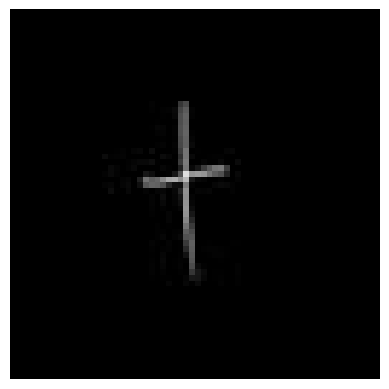

In [ ]:
plt.imshow(china_images[1499])  # For grayscale images
plt.axis('off')  # Turn off axes
plt.show()

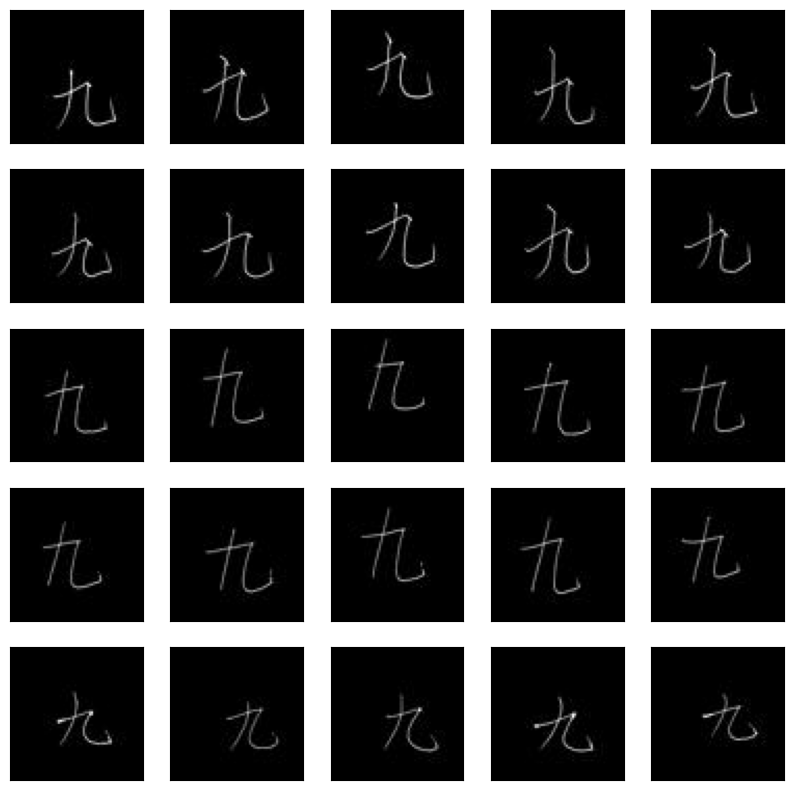

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(china_images[i+100], cmap=plt.cm.binary)
plt.show()

שאלה 19





Building the neural network requires configuring the layers of the model, then compiling the model.

In [ ]:
china_x_train, china_x_test, china_y_train, china_y_test = train_test_split(china_images,labels_numeric,test_size=0.2,random_state=42)
print(china_x_train.shape)
print(china_y_train)


(12000, 64, 64, 3)
[ 3  3  1 ... 14  9  1]


In [ ]:
model_NN = keras.Sequential([
    keras.layers.Flatten(input_shape=(64,64,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(128)
])

model_NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 128)               1572992   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
Total params: 1589504 (6.06 MB)
Trainable params: 1589504 (6.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_NN.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_NN.fit(china_x_train, china_y_train, epochs=10,batch_size=100)

Epoch 1/10
120/120 [==============================] - 4s 32ms/step - loss: 5.6603 - accuracy: 0.0892
Epoch 2/10
120/120 [==============================] - 5s 39ms/step - loss: 4.3571 - accuracy: 0.1293
Epoch 3/10
120/120 [==============================] - 4s 35ms/step - loss: 4.0956 - accuracy: 0.1510
Epoch 4/10
120/120 [==============================] - 4s 34ms/step - loss: 3.8643 - accuracy: 0.1680
Epoch 5/10
120/120 [==============================] - 5s 41ms/step - loss: 3.6263 - accuracy: 0.1729
Epoch 6/10
120/120 [==============================] - 4s 33ms/step - loss: 3.3964 - accuracy: 0.1838
Epoch 7/10
120/120 [==============================] - 4s 34ms/step - loss: 3.0374 - accuracy: 0.1839
Epoch 8/10
120/120 [==============================] - 5s 42ms/step - loss: 2.9008 - accuracy: 0.1966
Epoch 9/10
120/120 [==============================] - 4s 33ms/step - loss: 2.8148 - accuracy: 0.2013
Epoch 10/10
120/120 [==============================] - 4s 34ms/step - loss: 2.7592 - accura

In [ ]:
# Get predictions for training data
train_predictions = model_NN.predict(china_x_train)
train_predictions = np.argmax(train_predictions, axis=1)  # Convert probabilities to class labels

# Get predictions for testing data
test_predictions = model_NN.predict(china_x_test)
test_predictions = np.argmax(test_predictions, axis=1)  # Convert probabilities to class labels

# Generate classification report for training data
train_classification_report = classification_report(china_y_train, train_predictions)

# Generate classification report for testing data
test_classification_report = classification_report(china_y_test, test_predictions)

print("Training Classification Report:\n", train_classification_report)
print("\nTesting Classification Report:\n", test_classification_report)

94/94 [==============================] - 2s 14ms/step
Training Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.22      0.35       814
           1       0.83      0.91      0.87       818
           2       0.65      0.40      0.49       794
           3       0.56      0.52      0.54       802
           4       1.00      0.00      0.00       806
           5       0.59      0.15      0.24       793
           6       0.33      0.12      0.18       797
           7       0.22      0.09      0.13       799
           8       0.92      0.79      0.85       812
           9       0.00      0.00      0.00       799
          10       0.48      0.43      0.45       811
          11       0.11      0.90      0.19       791
          12       0.39      0.43      0.41       779
          13       0.00      0.00      0.00       783
          14       0.23      0.01      0.03       802

    accuracy                           0.33    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

שאלה 20

#CNN

## Build the model

In [ ]:
china_x_train1, china_x_test1, china_y_train1, china_y_test1 = train_test_split(china_images,labels_numeric,test_size=0.2)

In [ ]:
model_CNN = keras.Sequential(
    [
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        layers.MaxPooling2D(2, 2),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(15)
    ]
)

model_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 31, 31, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                      

Train the model:

In [ ]:
# Specify the log directory (You can adjust this path)
log_dir = '/content/tensorboard_logs'
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)

In [ ]:
model_CNN.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model_CNN.fit(china_x_train1, china_y_train1, epochs=4,validation_data=(china_x_test1, china_y_test1),validation_split=0.25,callbacks=[tensorboard_callback])

Epoch 1/4
375/375 [==============================] - 210s 554ms/step - loss: 0.4042 - accuracy: 0.8762 - val_loss: 0.1765 - val_accuracy: 0.9393
Epoch 2/4
375/375 [==============================] - 207s 553ms/step - loss: 0.0827 - accuracy: 0.9757 - val_loss: 0.0686 - val_accuracy: 0.9780
Epoch 3/4
375/375 [==============================] - 208s 554ms/step - loss: 0.0440 - accuracy: 0.9878 - val_loss: 0.0570 - val_accuracy: 0.9813
Epoch 4/4
375/375 [==============================] - 203s 542ms/step - loss: 0.0287 - accuracy: 0.9921 - val_loss: 0.0349 - val_accuracy: 0.9887


In [ ]:
# Get predictions for training data
CNN_train_predictions = model_CNN.predict(china_x_train1)
CNN_train_predictions = np.argmax(CNN_train_predictions, axis=1)  # Convert probabilities to class labels

# Get predictions for testing data
CNN_test_predictions = model_CNN.predict(china_x_test1)
CNN_test_predictions = np.argmax(CNN_test_predictions, axis=1)  # Convert probabilities to class labels

# Generate classification report for training data
CNN_train_classification_report = classification_report(china_y_train1, CNN_train_predictions)

# Generate classification report for testing data
CNN_test_classification_report = classification_report(china_y_test1, CNN_test_predictions)

print("CNN Training Classification Report:\n", CNN_train_classification_report)
print("\nCNN Testing Classification Report:\n", CNN_test_classification_report)


94/94 [==============================] - 13s 138ms/step
CNN Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       805
           1       1.00      1.00      1.00       795
           2       0.99      1.00      1.00       797
           3       1.00      0.99      0.99       797
           4       1.00      1.00      1.00       790
           5       1.00      1.00      1.00       829
           6       1.00      1.00      1.00       814
           7       1.00      1.00      1.00       776
           8       1.00      1.00      1.00       809
           9       1.00      1.00      1.00       786
          10       1.00      1.00      1.00       815
          11       1.00      1.00      1.00       800
          12       0.99      1.00      1.00       799
          13       1.00      1.00      1.00       797
          14       1.00      1.00      1.00       791

    accuracy                           1.

שאלה 21



The CNN shows an image prediction accuracy of 0.98 (98%), while the NN shows an accuracy of only 0.33 (33%). The big difference just indicates that the CNN works much better in predicting and recognizing images than the NN. The poor detection of the NN shows that it gets stuck in fitting-under to the spatial structure in the images and is not able to match them well. While the CNN manages to fit more (fitting-over) and understand the spatial structure in the images in a more efficient way, which leads to good recognition and high accuracy in dealing with the specific task of predicting the images.


שאלה 22

Convolutional Neural Networks perform image prediction efficiently and accurately due to their architecture. The main idea is carried out by the convolution layers, which scan the image using filters to detect spatial visual features, such as lines and corners. This allows the model to understand the structure of the image effectively and identify objects and features accurately.